<a href="https://colab.research.google.com/github/ankesh86/TimeSeriesAnalysis/blob/main/Forecasting_DeepLearningMethods.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Time-Series Forecasting using LSTM**

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import sklearn.preprocessing


In [49]:
from sklearn.metrics import r2_score
from keras.layers import Dense, Dropout, SimpleRNN, LSTM
from keras.models import Sequential

## Importing the data

In [50]:
import requests

#data
urlA = 'https://raw.githubusercontent.com/ankesh86/TimeSeriesAnalysis/master/Data/DOM_hourly.csv'

data = pd.read_csv(urlA, index_col='Datetime', parse_dates=['Datetime'])
data.head()


,DOM_MW
Datetime,
2005-12-31 01:00:00,9389.0
2005-12-31 02:00:00,9070.0
2005-12-31 03:00:00,9001.0
2005-12-31 04:00:00,9042.0
2005-12-31 05:00:00,9132.0


In [51]:
data.isna().sum()


DOM_MW    0
dtype: int64

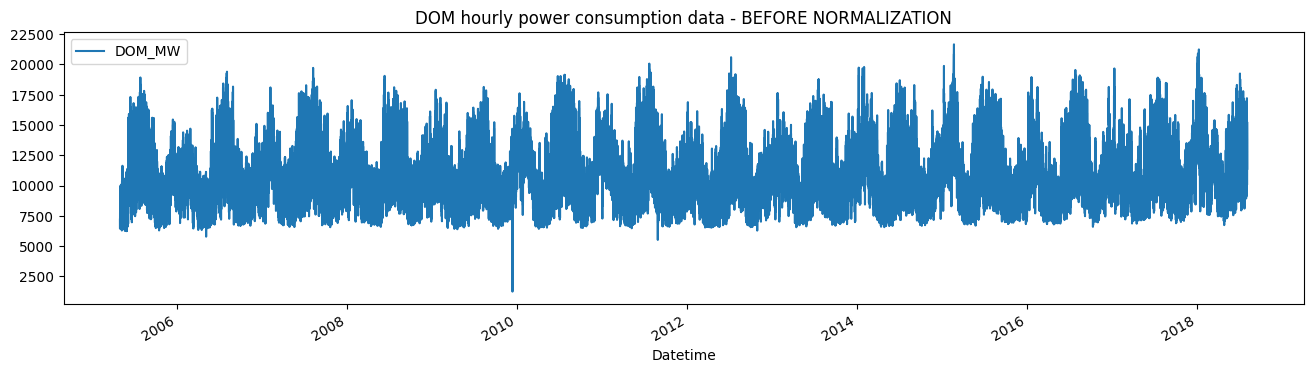

In [52]:
data.plot(figsize=(16,4), legend=True)
plt.title('DOM hourly power consumption data - BEFORE NORMALIZATION')
plt.show()

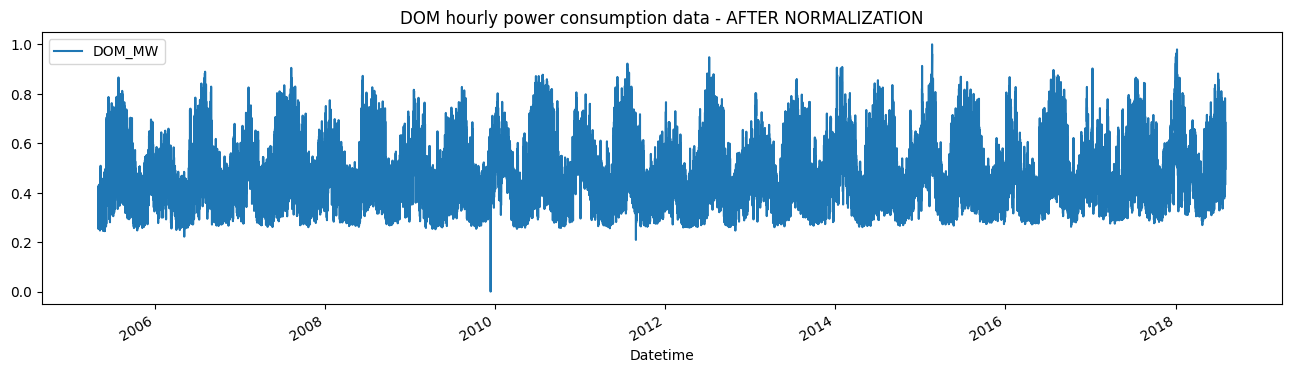

In [54]:
#Normalize DOM hourly power consumption data

def normalize_data(df):
    scaler = sklearn.preprocessing.MinMaxScaler()
    df['DOM_MW']=scaler.fit_transform(df['DOM_MW'].values.reshape(-1,1))
    return df

df_norm = normalize_data(data)
df_norm.shape

#Visualize data after normalization

df_norm.plot(figsize=(16,4),legend=True)

plt.title('DOM hourly power consumption data - AFTER NORMALIZATION')

plt.show()

In [55]:
def data_prep(data, length):
  X=[]
  y=[]

  for i in range(length, len(data)):
    X.append(data.iloc[i - length:i, 0])
    y.append(data.iloc[i,0])

  #test-train split
  train_X = X[:110000]
  train_y = y[:110000]

  train_X = np.array(train_X)
  train_y = np.array(train_y)

  test_X = X[110000:]
  test_y = y[110000:]

  test_X = np.array(test_X)
  test_y = np.array(test_y)

  #reshaping data to required format to input to RNN, LSTM models

  train_X = np.reshape(train_X, (110000, length, 1))
  test_X = np.reshape(test_X, (test_X.shape[0], length, 1))

  return [train_X, train_y, test_X, test_y]



In [57]:
seq_length = 20
train_X, train_y, test_X, test_y = data_prep(df_norm, seq_length)

print('train_X.shape = ',train_X.shape)
print('train_y.shape = ',train_y.shape)
print('test_X.shape = ',test_X.shape)
print('test_y.shape = ',test_y.shape)

train_X.shape =  (110000, 20, 1)
train_y.shape =  (110000,)
test_X.shape =  (6169, 20, 1)
test_y.shape =  (6169,)


In [61]:
model = Sequential()
model.add(LSTM(40, activation="tanh", return_sequences=True, input_shape=(train_X.shape[1], 1)))
model.add(Dropout(0.15))

model.add(LSTM(40, activation="tanh", return_sequences=True))
model.add(Dropout(0.15))

model.add(LSTM(40, activation="tanh", return_sequences=False))
model.add(Dropout(0.15))

model.add(Dense(1))

model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_12 (LSTM)              (None, 20, 40)            6720      
                                                                 
 dropout_18 (Dropout)        (None, 20, 40)            0         
                                                                 
 lstm_13 (LSTM)              (None, 20, 40)            12960     
                                                                 
 dropout_19 (Dropout)        (None, 20, 40)            0         
                                                                 
 lstm_14 (LSTM)              (None, 40)                12960     
                                                                 
 dropout_20 (Dropout)        (None, 40)                0         
                                                                 
 dense_6 (Dense)             (None, 1)                

In [62]:
#fit the model
model.compile(optimizer="adam", loss="MSE")
model.fit(train_X, train_y, epochs=10, batch_size=1000)

Epoch 1/10
110/110 [==============================] - 36s 249ms/step - loss: 0.0234
Epoch 2/10
110/110 [==============================] - 27s 243ms/step - loss: 0.0117
Epoch 3/10
110/110 [==============================] - 33s 297ms/step - loss: 0.0096
Epoch 4/10
110/110 [==============================] - 28s 256ms/step - loss: 0.0051
Epoch 5/10
110/110 [==============================] - 28s 254ms/step - loss: 0.0039
Epoch 6/10
110/110 [==============================] - 29s 266ms/step - loss: 0.0031
Epoch 7/10
110/110 [==============================] - 29s 266ms/step - loss: 0.0025
Epoch 8/10
110/110 [==============================] - 29s 264ms/step - loss: 0.0022
Epoch 9/10
110/110 [==============================] - 29s 260ms/step - loss: 0.0020
Epoch 10/10
110/110 [==============================] - 30s 275ms/step - loss: 0.0018


In [63]:
predictions = model.predict(test_X)
score = r2_score(test_y, predictions)
print("R-Squared Score of LSTM model", score)

193/193 [==============================] - 3s 10ms/step
R-Squared Score of LSTM model 0.9301947806352735


In [64]:
def plotting_actual_vs_pred(y_test, y_pred, title):
  plt.figure(figsize=(16,4))
  plt.plot(y_test, color='blue', label='Actual power consumption data')
  plt.plot(y_pred, alpha=0.7, color='orange', label='Predicted power consumption data')
  plt.title(title)
  plt.xlabel('Time')
  plt.ylabel('Normalized power cosumption scale')
  plt.legend()
  plt.show()


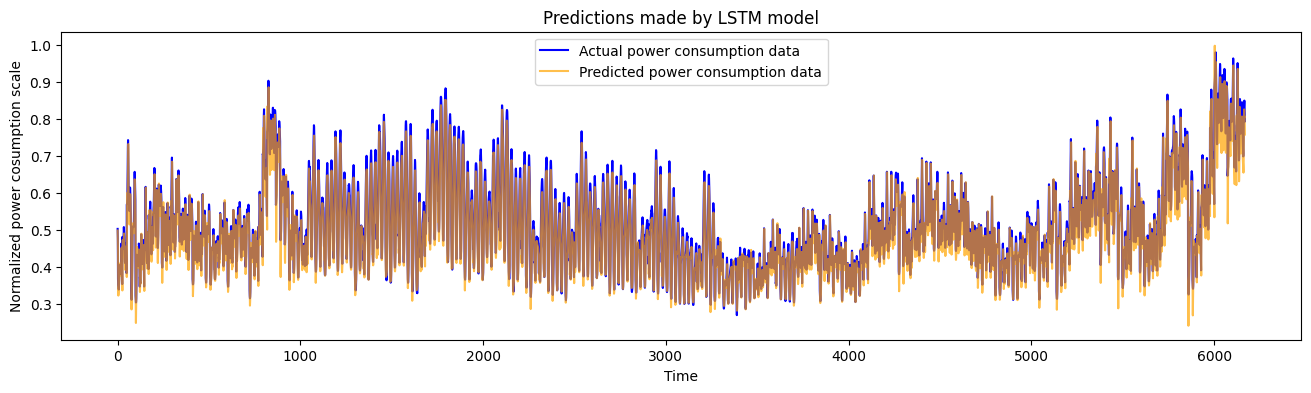

In [65]:
plotting_actual_vs_pred(test_y, predictions, "Predictions made by LSTM model")

# **GRU**

In [66]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [67]:
train_datafile = 'https://raw.githubusercontent.com/ankesh86/TimeSeriesAnalysis/master/Data/DailyDelhiClimateTrain.csv'
test_datafile = 'https://raw.githubusercontent.com/ankesh86/TimeSeriesAnalysis/master/Data/DailyDelhiClimateTest.csv'

train_data = pd.read_csv(train_datafile, index_col=0)
# Display dimensions of dataframe
print(train_data.shape)
print(train_data.info())

(1462, 4)
<class 'pandas.core.frame.DataFrame'>
Index: 1462 entries, 2013-01-01 to 2017-01-01
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   meantemp      1462 non-null   float64
 1   humidity      1462 non-null   float64
 2   wind_speed    1462 non-null   float64
 3   meanpressure  1462 non-null   float64
dtypes: float64(4)
memory usage: 57.1+ KB
None


In [68]:
print("-----------------------------------------------------------------------")
print("Original dataset  : \n",train_data.sample(10))

-----------------------------------------------------------------------
Original dataset  : 
              meantemp   humidity  wind_speed  meanpressure
date                                                      
2013-06-12  34.142857  54.142857    7.414286    998.000000
2013-06-19  29.857143  72.857143    4.228571    999.000000
2015-02-04  14.625000  81.125000    9.250000   1022.000000
2014-03-31  24.125000  44.125000   13.200000   1008.250000
2016-02-14  17.642857  61.928571    8.071429   1017.214286
2015-12-01  19.250000  78.750000    1.625000   1014.750000
2013-12-01  18.000000  65.000000    1.585714   1016.142857
2015-12-04  17.625000  67.500000    4.637500   1015.000000
2014-10-03  30.500000  52.625000    1.850000   1008.000000
2015-11-29  18.125000  81.250000    1.162500   1018.000000


In [69]:
print("-----------------------------------------------------------------------")
# Display statistics for numeric columns
print(train_data.describe())

-----------------------------------------------------------------------
          meantemp     humidity   wind_speed  meanpressure
count  1462.000000  1462.000000  1462.000000   1462.000000
mean     25.495521    60.771702     6.802209   1011.104548
std       7.348103    16.769652     4.561602    180.231668
min       6.000000    13.428571     0.000000     -3.041667
25%      18.857143    50.375000     3.475000   1001.580357
50%      27.714286    62.625000     6.221667   1008.563492
75%      31.305804    72.218750     9.238235   1014.944901
max      38.714286   100.000000    42.220000   7679.333333


-----------------------------------------------------------------------


array([<Axes: xlabel='date'>, <Axes: xlabel='date'>,
       <Axes: xlabel='date'>, <Axes: xlabel='date'>], dtype=object)

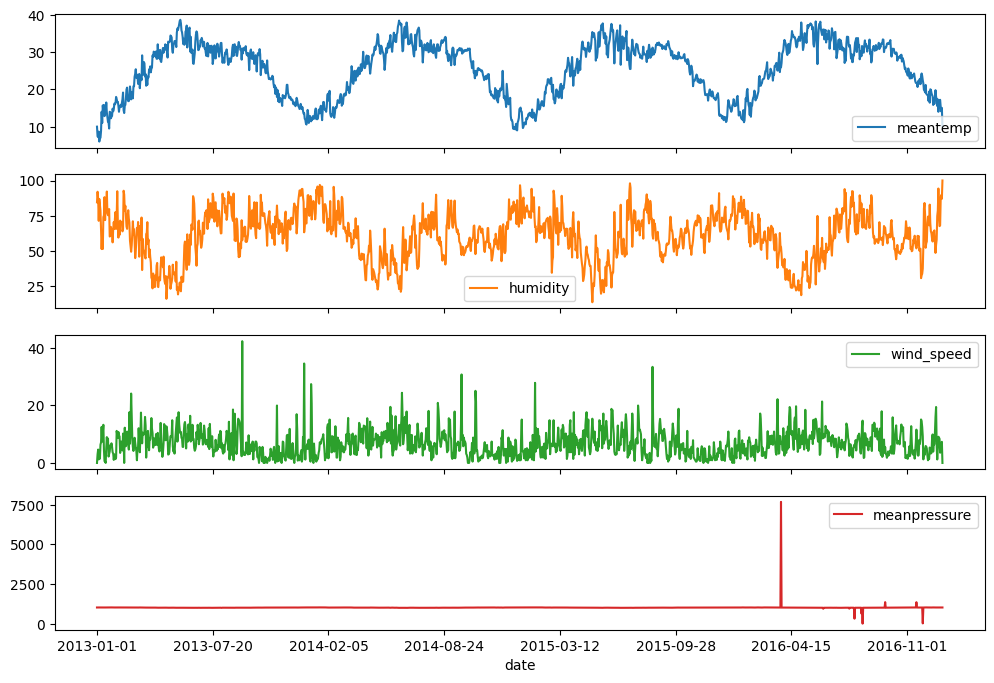

In [70]:
print("-----------------------------------------------------------------------")
train_data.plot(figsize=(12,8),subplots=True)

array([[<Axes: title={'center': 'meantemp'}>,
        <Axes: title={'center': 'humidity'}>],
       [<Axes: title={'center': 'wind_speed'}>,
        <Axes: title={'center': 'meanpressure'}>]], dtype=object)

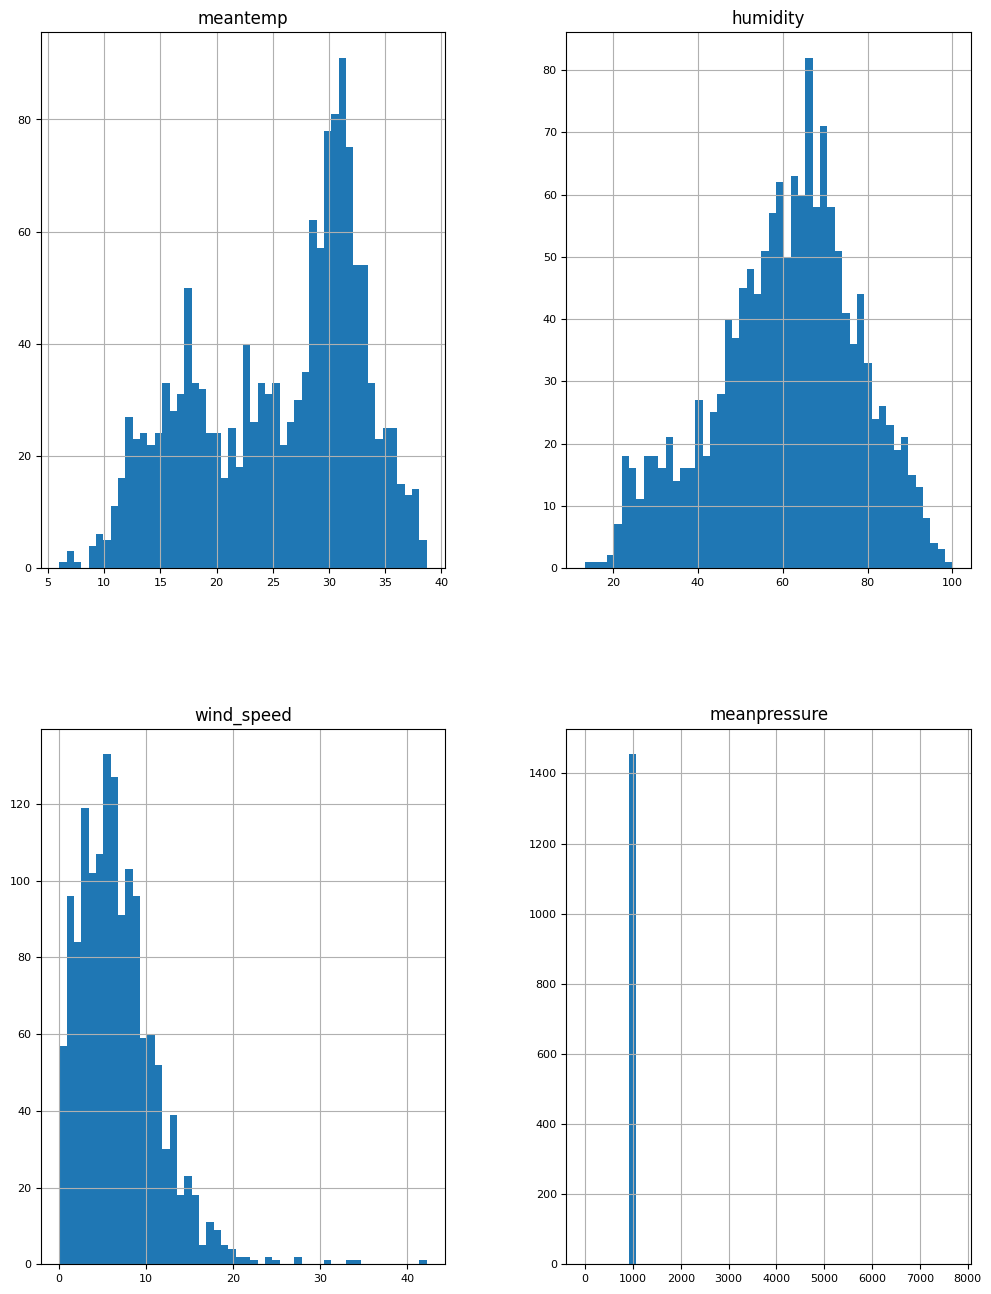

In [71]:
# Now lets plot them all
train_data.hist(figsize=(12, 16), bins=50, xlabelsize=8, ylabelsize=8)

null values : 
 meantemp        0
humidity        0
wind_speed      0
meanpressure    0
dtype: int64


<Axes: ylabel='date'>

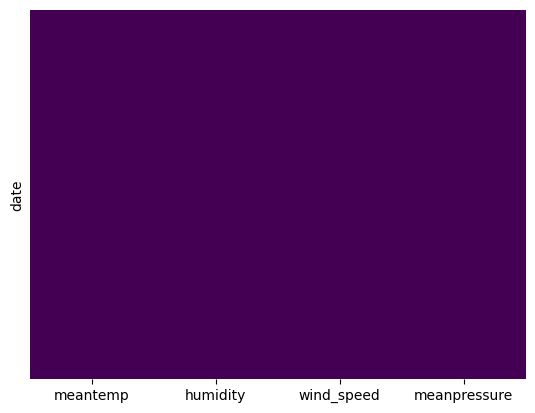

In [72]:
# To check Missing Values
print("null values : \n",train_data.isnull().sum())
sns.heatmap(train_data.isnull(), cbar=False, yticklabels=False, cmap="viridis")

In [73]:
# We choose a specific feature (features). In this example,
my_dataset = train_data[["meantemp",'humidity','wind_speed','meanpressure']]


print("Our new dataset : \n",my_dataset.sample(5))

Our new dataset : 
              meantemp   humidity  wind_speed  meanpressure
date                                                      
2014-12-08  17.000000  49.875000    2.775000   1015.000000
2016-05-21  36.133333  45.400000   10.873333    995.933333
2015-04-23  30.750000  33.000000    8.100000   1004.000000
2015-05-08  34.125000  22.375000   12.275000   1003.250000
2016-09-10  31.230769  58.230769   11.969231   1005.230769


In [74]:
print("-----------------------------------------------------------------------")
# ensure all data is float
my_dataset = my_dataset.astype("float32")
values     = my_dataset.values
print("values : \n",values)

-----------------------------------------------------------------------
values : 
 [[  10.          84.5          0.        1015.6667   ]
 [   7.4         92.           2.98      1017.8      ]
 [   7.1666665   87.           4.633333  1018.6667   ]
 ...
 [  14.095238    89.666664     6.266667  1017.9048   ]
 [  15.052631    87.           7.325     1016.1      ]
 [  10.         100.           0.        1016.       ]]


In [75]:
print("-----------------------------------------------------------------------")
# normalize features
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
print("scaled : \n",scaled)

-----------------------------------------------------------------------
scaled : 
 [[0.12227073 0.8209571  0.         0.1326033 ]
 [0.04279476 0.9075908  0.07058267 0.13288099]
 [0.03566229 0.849835   0.10974261 0.1329938 ]
 ...
 [0.24745268 0.88063806 0.14842887 0.13289464]
 [0.276718   0.849835   0.17349596 0.1326597 ]
 [0.12227073 1.0000001  0.         0.1326467 ]]


In [76]:
# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = pd.DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [("var%d(t-%d)" % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
              names += [("var%d(t)" % (j+1)) for j in range(n_vars)]
        else:
              names += [("var%d(t+%d)" % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

In [77]:
# frame as supervised learning
# reshape into X=t and Y=t+1
i_in  = 100 # past observations
n_out = 1 # future observations
reframed = series_to_supervised(scaled, i_in, n_out)
print("Represent the dataset as a supervised learning problem : \n",reframed.head(10))
print("-----------------------------------------------------------------------")

Represent the dataset as a supervised learning problem : 
      var1(t-100)  var2(t-100)  var3(t-100)  var4(t-100)  var1(t-99)  \
100     0.122271     0.820957     0.000000     0.132603    0.042795   
101     0.042795     0.907591     0.070583     0.132881    0.035662   
102     0.035662     0.849835     0.109743     0.132994    0.081514   
103     0.081514     0.668867     0.029212     0.132799    0.000000   
104     0.000000     0.847910     0.087636     0.132712    0.030568   
105     0.030568     0.801320     0.035054     0.132907    0.030568   
106     0.030568     0.752805     0.149218     0.133167    0.087336   
107     0.087336     0.580858     0.169182     0.133000    0.244541   
108     0.244541     0.436881     0.296068     0.132777    0.152838   
109     0.152838     0.561056     0.175272     0.132603    0.296943   

     var2(t-99)  var3(t-99)  var4(t-99)  var1(t-98)  var2(t-98)  ...  \
100    0.907591    0.070583    0.132881    0.035662    0.849835  ...   
101    0.849835

In [80]:
#split into test-train split
values_spl = reframed.values
train_size = int(len(values_spl)* 0.80)
test_size = len(values_spl) - train_size

train, test = values_spl[0:train_size,:], values_spl[train_size:len(values_spl),:]

print("len train and test : ",len(train), " ", len(test))
print("----------------")

#split into input and output
X_train, y_train = train[:, :-4], train[:, -4:]
X_test, y_test = test[:, :-4], test[:, -4:]

print("X_train shape : ",X_train.shape, " y_train shape : ", y_train.shape)
print("X_test shape : ",X_test.shape, " y_test shape : ", y_test.shape)

len train and test :  1089   273
----------------
X_train shape :  (1089, 400)  y_train shape :  (1089, 4)
X_test shape :  (273, 400)  y_test shape :  (273, 4)


In [81]:
#reshape input to be 3D [samples, timestamps, features]

X_train = X_train.reshape((X_train.shape[0],1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0],1, X_test.shape[1]))

In [82]:

print("X_train shape 3D : ", X_train.shape," y_train shape : ", y_train.shape)

print("X_test shape 3D : ", X_test.shape," y_test shape : ", y_test.shape)



X_train shape 3D :  (1089, 1, 400)  y_train shape :  (1089, 4)
X_test shape 3D :  (273, 1, 400)  y_test shape :  (273, 4)


## Building the model

In [83]:
#import and define the layer
model = keras.models.Sequential()

model.add(keras.layers.GRU(64, return_sequences=True, activation="relu", kernel_initializer="he_normal", recurrent_initializer="he_normal",
                           dropout=0.15, recurrent_dropout = 0.15, input_shape = (X_train.shape[1], X_train.shape[2])))

model.add(keras.layers.GRU(32, return_sequences=True, activation="relu", kernel_initializer="he_normal", recurrent_initializer="he_normal",
                           dropout=0.15, recurrent_dropout = 0.15))

model.add(keras.layers.GRU(8, activation="relu", kernel_initializer="he_normal", recurrent_initializer="he_normal",
                           dropout=0.15, recurrent_dropout = 0.15))

model.add(keras.layers.Dense(4,activation="relu"))

print(model.summary())

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 1, 64)             89472     
                                                                 
 gru_1 (GRU)                 (None, 1, 32)             9408      
                                                                 
 gru_2 (GRU)                 (None, 8)                 1008      
                                                                 
 dense_7 (Dense)             (None, 4)                 36        
                                                                 
Total params: 99924 (390.33 KB)
Trainable params: 99924 (390.33 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


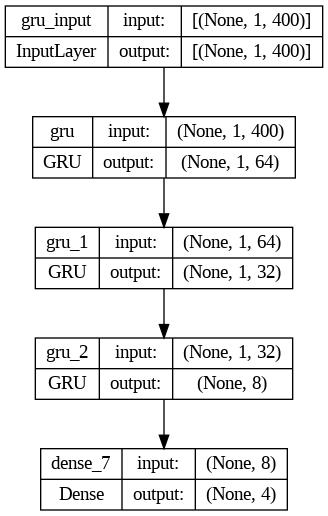

In [85]:
##plot model

from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True)

In [86]:
#compiling the model
optimizer = keras.optimizers.Adam(learning_rate=0.01, beta_1=0.9, beta_2=0.999)

model.compile(loss="mean_squared_error", optimizer=optimizer, metrics=["mse","mae"])

#Learning rate scheduling
lr_scheduler = keras.callbacks.ReduceLROnPlateau(factor=0.00001, patience=3, monitor="val_loss", min_lr=0.00000001)

#training and evaluating the model
history = model.fit(X_train, y_train, epochs=100, batch_size=64, validation_split=0.2, callbacks=[lr_scheduler])

Epoch 1/100
14/14 [==============================] - 13s 136ms/step - loss: 0.1487 - mse: 0.1487 - mae: 0.2980 - val_loss: 0.1053 - val_mse: 0.1053 - val_mae: 0.2435 - lr: 0.0100
Epoch 2/100
14/14 [==============================] - 0s 31ms/step - loss: 0.1105 - mse: 0.1105 - mae: 0.2479 - val_loss: 0.0990 - val_mse: 0.0990 - val_mae: 0.2108 - lr: 0.0100
Epoch 3/100
14/14 [==============================] - 0s 30ms/step - loss: 0.1027 - mse: 0.1027 - mae: 0.2201 - val_loss: 0.0977 - val_mse: 0.0977 - val_mae: 0.2019 - lr: 0.0100
Epoch 4/100
14/14 [==============================] - 0s 27ms/step - loss: 0.1000 - mse: 0.1000 - mae: 0.2091 - val_loss: 0.0973 - val_mse: 0.0973 - val_mae: 0.1992 - lr: 0.0100
Epoch 5/100
14/14 [==============================] - 2s 140ms/step - loss: 0.0993 - mse: 0.0993 - mae: 0.2050 - val_loss: 0.0967 - val_mse: 0.0967 - val_mae: 0.1973 - lr: 0.0100
Epoch 6/100
14/14 [==============================] - 0s 15ms/step - loss: 0.0987 - mse: 0.0987 - mae: 0.2025 - v

## **Evaluate and predict the model**

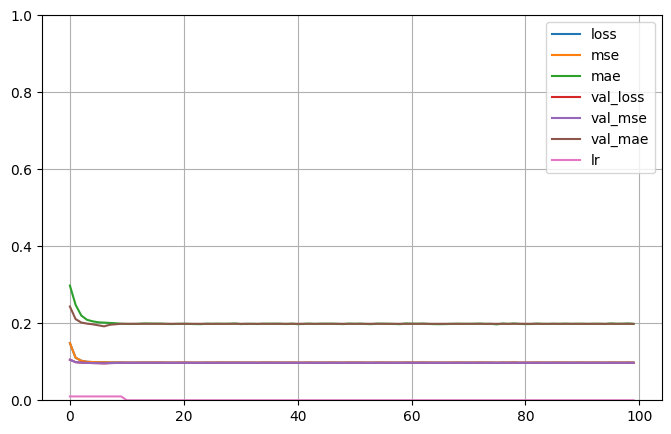

In [87]:
##plot the learning curves
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)

plt.gca().set_ylim(0,1)
plt.show()

In [88]:
print("------------------------------")
model_evaluate = model.evaluate(X_test, y_test)
print("Loss                : ", model_evaluate[0])
print("Mean Squared Error  : ", model_evaluate[1])
print("Mean Absolute Error : ", model_evaluate[2])

#make predictions
trainPredict = model.predict(X_train)
testPredict = model.predict(X_test)
print("trainPredict :", trainPredict.shape)
print("testPredict  :", testPredict.shape)
print(trainPredict)

testPredict = scaler.inverse_transform(testPredict)
print(testPredict.shape)
print(y_test.shape)

y_test = scaler.inverse_transform(y_test)


------------------------------
9/9 [==============================] - 0s 4ms/step - loss: 0.0877 - mse: 0.0877 - mae: 0.1988
Loss                :  0.08771870285272598
Mean Squared Error  :  0.08771870285272598
Mean Absolute Error :  0.1988365352153778
9/9 [==============================] - 0s 5ms/step
trainPredict : (1089, 4)
testPredict  : (273, 4)
[[0.6567401  0.         0.         0.12973757]
 [0.6616033  0.         0.         0.12968333]
 [0.6653887  0.         0.         0.1296564 ]
 ...
 [0.58763623 0.         0.         0.13004293]
 [0.6153468  0.         0.         0.1298119 ]
 [0.604612   0.         0.         0.12989411]]
(273, 4)
(273, 4)
